# Аналитика поведения пользователей мобильного приложения

## Описание проекта
 - Изучение воронки продаж. Анализ пользовательского пути до покупки. Вывявление проблемных шагов.
 - Изучение результатов A/A/B-эксперимента, изменения шрифтов во всём приложении. Пользователей разбиты на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Определение лучшего шрифта.
 
## Описание данных
Каждая запись в логе — это действие пользователя, или событие.

    EventName — название события;
    DeviceIDHash — уникальный идентификатор пользователя;
    EventTimestamp — время события;
    ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

<a id="id0"></a>
## Содержание: 

[1. **Шаг 1. Выгрузка данных и подключение необходимых бибиотек.**](#id1)<br>
[2. **Шаг 2. Подготовка данных.**](#id2)<br>
[3. **Шаг 3. Изучение и проверка данных.**](#id3)<br>
[4. **Шаг 4. Изучение воронки событий.**](#id4)<br>
[5. **Шаг 5. Изучение результатов эксперимента.**](#id5)<br>

<a id="id1"></a>
## Шаг 1. Выгрузка данных и подключение необходимых бибиотек.
[к содержанию](#id0)<br>

In [1]:
#подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import time
import datetime

In [2]:
#выгрузка данных
try:
    logs_exp = pd.read_csv('C:/projects/logs_exp.csv',sep='\t')
except:
    logs_exp = pd.read_csv(r'/datasets/logs_exp.csv',sep='\t')

In [3]:
#изучение данных
print('\033[1m' + 'Таблица с логами действий в мобильном приложении:' + '\033[0m')
print ('\033[1m' + 'Вывод метода info()' + '\033[0m')
logs_exp.info()
print ('\033[1m' + 'Просмотр первых строк таблицы:' + '\033[0m')
print(logs_exp.head(5))
print('\033[1m' +'----------------------------' + '\033[0m')

Таблица с логами действий в мобильном приложении:
Вывод метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
Просмотр первых строк таблицы:
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
----------------------------


<a id="id2"></a>
## Шаг 2. Подготовка данных.
[к содержанию](#id0)<br>

Наименование столбцов в принципе удобны и rкорректны, не нуждаются в обработке.
Типы данных также не нуждаются в обработке. Пропусков не обнаружено

In [4]:
#добавление столбцов с датами и временем
logs_exp['DateTimeEvent'] =logs_exp['EventTimestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
logs_exp['DateEvent'] = logs_exp['DateTimeEvent'].astype('datetime64[D]')
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
dup = len(logs_exp[logs_exp.duplicated()])
print(f'Количество дубликатов = {dup} это ', dup/len(logs_exp)*100 ,"% от всех данных"  )
logs_exp= logs_exp.drop_duplicates()
#print('Столбец даты и времени, а также отдельный столбец дат были добавлены.')

РЕЗУЛЬТАТЫ:
Количество дубликатов = 413 это  0.16917493425526162 % от всех данных


### ВЫВОД:
    - Были обнаружены пропуски, в доли меньше процента от всех данных, поэтому они были удалены.
    - Столбец даты и времени, а также отдельный столбец дат были добавлены.

<a id="id3"></a>
## Шаг 3. Изучение и проверка данных.
[к содержанию](#id0)<br>

In [15]:
def show_hist(data,bins,name1,name2,title):
    plt.figure(figsize=(14,4))
    data.hist(bins=bins)
    plt.title(title)
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.show()

РЕЗУЛЬТАТЫ:
Всего событий в логе 243713 штуки
Всего пользователей в логе 7551
------------------------------------------------------------------------------------------------


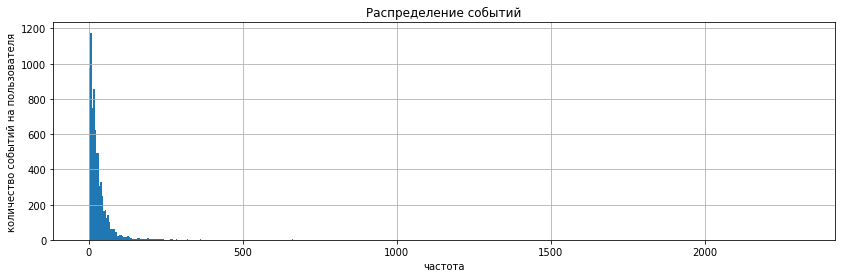

Характерным значением количества событий на пользователя является мода, равная 5
------------------------------------------------------------------------------------------------
Период исследования в данных равен 13.0 дням
------------------------------------------------------------------------------------------------


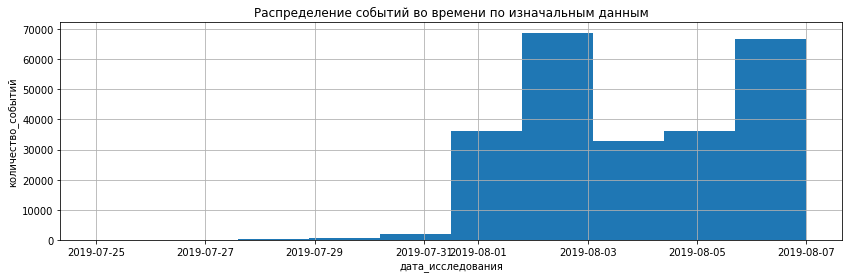

In [18]:
#события\пользователи\среднее событий на пользователя
countEvent =logs_exp['EventName'].shape[0]
countUsers = logs_exp['DeviceIDHash'].nunique()
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
print(f'Всего событий в логе {countEvent} штуки')
print(f'Всего пользователей в логе {countUsers}')
print('\033[1m' +'------------------------------------------------------------------------------------------------' + '\033[0m')
count_actions_per_u = logs_exp.groupby('DeviceIDHash',as_index=False).agg({'EventName':'count'})['EventName']
show_hist(count_actions_per_u,500,'частота','количество событий на пользователя','Распределение событий')
print('Характерным значением количества событий на пользователя является мода, равная', *count_actions_per_u.mode())
print('\033[1m' +'------------------------------------------------------------------------------------------------' + '\033[0m')
#период исследования
period = (logs_exp['DateEvent'].max()-logs_exp['DateEvent'].min())/np.timedelta64(1,'D')
print(f'Период исследования в данных равен {period} дням')
print('\033[1m' +'------------------------------------------------------------------------------------------------' + '\033[0m')
#график по начальным данным 
show_hist(logs_exp['DateEvent'],10,'дата_исследования','количество_событий','Распределение событий во времени по изначальным данным')

- На основе гистограммы предположтительно данные первые 6 дней захвачены из прошлого, тк на седьмой день нистограмма имеет более выраженное поведение. Следовательно, истинно для анализа располагаем период в 8 дней, начиная с 1 числа. Ниже эти данные отбрасываются.


РЕЗУЛЬТАТЫ:


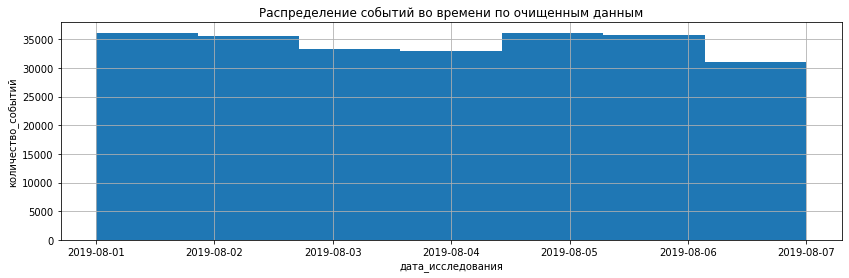

------------------------------------------------------------------------------------------------
Данные после очистки:
пользователей потеряно 17, это 0.2% всех пользователей.
событий потеряно 2826, это 1.2% всех событий.
------------------------------------------------------------------------------------------------
Проверка целостности групп:
   ExpId  EventTimestamp
0    246           66582
1    247           65712
2    248           71929


In [8]:
#график с очищенными данными 
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
clean = logs_exp[logs_exp['DateEvent']>'2019-07-31']
show_hist(clean['DateEvent'],7,'дата_исследования','количество_событий','Распределение событий во времени по очищенным данным')
#информация об очищенных данных
print('\033[1m' +'------------------------------------------------------------------------------------------------' + '\033[0m')
print('Данные после очистки:')
all_users = logs_exp['DeviceIDHash'].nunique()
all_actions = logs_exp['EventName'].count()
lost_users = all_users-clean['DeviceIDHash'].nunique()
lost_action = all_actions-clean['EventName'].count()
print(f'пользователей потеряно {lost_users}, это {(lost_users/all_users):.1%} всех пользователей.')
print(f'событий потеряно {lost_action}, это {(lost_action/all_actions):.1%} всех событий.')
print('\033[1m' +'------------------------------------------------------------------------------------------------' + '\033[0m')
print('Проверка целостности групп:')
print(logs_exp.groupby('ExpId',as_index=False).agg({'EventTimestamp':'nunique'}))

### ВЫВОДЫ:
    - Отброшены слабо выраженные значения, вероятно полученные из прошлого. Доля отброшеных данных не имеет значимого процентного содержания для всей используемой базы. 
    - Целостность количества групп не была утрачена.

<a id="id4"></a>
## Шаг 4. Изучение воронки событий.
[к содержанию](#id0)<br>

In [23]:
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
print('\033[1m' +'Частота встречаемых событий:'+'\033[0m')
sort_clean = clean.groupby('EventName',as_index=False).agg({'EventTimestamp':'nunique'}).sort_values(by ='EventTimestamp',ascending=False)
print(sort_clean)
#воронка активностей
print('------------------------------------------------------------------------------------------------' )
print('\033[1m' +'Количество уникальных пользователей по типу события и доля пользователей по отношению ко всем пользователеям:'+'\033[0m')
sort_clean = clean.groupby('EventName',as_index=False).agg({'DeviceIDHash':'nunique'}).sort_values(by ='DeviceIDHash',ascending=False)
all_users_series_type = pd.Series(data = [all_users for i in range(0,len(sort_clean))], index = [1,2,0,3,4],name='AllUsers')
if 'AllUsers' not in sort_clean.columns:
    sort_clean = sort_clean.join(all_users_series_type)
sort_clean['PercentContent'] = sort_clean['DeviceIDHash']/sort_clean['AllUsers']
del sort_clean['AllUsers']
sort_clean['PercentContent'] = pd.Series(["{0:.2f}%".format(val * 100) for val in sort_clean['PercentContent']], index = sort_clean.index)
print(sort_clean)

РЕЗУЛЬТАТЫ:
Частота встречаемых событий:
                 EventName  EventTimestamp
1         MainScreenAppear          103628
2       OffersScreenAppear           43985
0         CartScreenAppear           40208
3  PaymentScreenSuccessful           32586
4                 Tutorial            1005
------------------------------------------------------------------------------------------------
Количество уникальных пользователей по типу события и доля пользователей по отношению ко всем пользователеям:
                 EventName  DeviceIDHash PercentContent
1         MainScreenAppear          7419         98.25%
2       OffersScreenAppear          4593         60.83%
0         CartScreenAppear          3734         49.45%
3  PaymentScreenSuccessful          3539         46.87%
4                 Tutorial           840         11.12%


- Как на основе рейтинга частоты событий, так и рейтинга количества пользователей событий выстраивается следующая модель воронки:  MainScreenAppear>OffersScreenAppear>CartScreenAppear>PaymentScreenSuccessful (событие Tutorial не лежит на пути к  ключевому действию, а скорей является вспомогательной опцией, от чего в воронке не учитывается)

РЕЗУЛЬТАТЫ:
                 EventName  DeviceIDHash PercentContent     Share
0         MainScreenAppear          7419         98.25%  1.000000
1       OffersScreenAppear          4593         60.83%  0.619086
2         CartScreenAppear          3734         49.45%  0.812976
3  PaymentScreenSuccessful          3539         46.87%  0.947777
------------------------------------------------------------------------------------------------


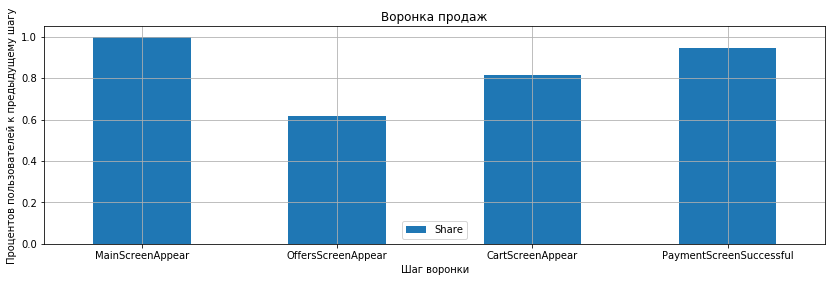

------------------------------------------------------------------------------------------------
Конверсия пользователей с первого действия в покупку = 47.70%


In [33]:
select_funnel = sort_clean[sort_clean['EventName'].isin(['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful'])]
select_funnel.reset_index(inplace=True)
del select_funnel['index']
for i in range(len(select_funnel)):
    if i==0:
        select_funnel.loc[0,'Share'] = 1
    else:    
        select_funnel.loc[i,'Share'] = select_funnel.loc[i,'DeviceIDHash'] /select_funnel.loc[i-1,'DeviceIDHash']
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')        
print(select_funnel)
select_funnel.plot.bar(y='Share', x='EventName',figsize=(14,4),title='Воронка продаж')
plt.xlabel('Шаг воронки')
plt.ylabel('Процентов пользователей к предыдущему шагу')
plt.xticks(rotation=0)
plt.grid()
print('\033[1m' +'------------------------------------------------------------------------------------------------' + '\033[0m')
plt.show()
print('\033[1m' +'------------------------------------------------------------------------------------------------' + '\033[0m')
first_action = select_funnel.loc[0,'DeviceIDHash']
payment_action = select_funnel.loc[3,'DeviceIDHash']
conversion_rate = payment_action/first_action
print(f'Конверсия пользователей с первого действия в покупку = {conversion_rate:.2%}')

### ВЫВОДЫ:
- больше всего теряется пользователей от предыдущего шага, порядка 40%, на шаге OffersScreenAppear(событие добавления товара вкорзину).

<a id="id5"></a>
## Шаг 5. Изучение результатов эксперимента.
[к содержанию](#id0)<br>

In [37]:
#используемые функции в блоке
def df_group_retantion(data_group):
    A_all_users = data_group['DeviceIDHash'].nunique()
    steps = data_group.groupby('EventName',as_index=False).agg({'DeviceIDHash':'nunique'}).sort_values('DeviceIDHash',ascending=False).reset_index()
    del steps['index']
    #получение словаря действие:количество пользователей
    g = {steps.loc[x,'EventName']:steps.loc[x,'DeviceIDHash'] for x in range(len(steps))}
    temp = pd.Series([1 for i in range(0,A_all_users)])
    for key,value in g.items(): #сюда
        #разметка конверсионных групп
        plus = pd.Series([1 for i in range(0,value)],name=key)
        minus = pd.Series([0 for i in range(0,A_all_users-value)],name=key)
        #объеденение групп
        m = pd.concat([plus, minus], axis=0 )
        m = m.reset_index()
        del m['index']
        #датафрейм разметки по типам активностей
        temp = pd.concat((temp,m),axis=1)
    del temp['Tutorial']
    del temp[0]
    return temp
#######
def result_hypophes(df_sampleA,df_sampleB,count_h):
    for i in df_sampleA.columns: 
        result = st.mannwhitneyu(df_sampleA[i], df_sampleB[i],alternative='two-sided')
        #поправка Холма — Бонферрони
        alpha = 0.05/count_h
        print(f'Стат значимость групп = {result.pvalue:.3f}')
        print(f"Проверка стат. значимости равенства для события {i}")
        if result.pvalue < alpha/2:
            print('Нулевая гипотеза о статистически незначимых различий конверсий двух групп не принимается:')
        else:
            (print
             ('Нулевая гипотеза о статистически незначимых различиях между конверсий групп не отвергается'))
        print('\033[1m' +'------------------------------------------------------------' + '\033[0m')

In [38]:
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')   
print('Количество человек в каждой группе:')   
print(logs_exp.groupby('ExpId',as_index=False).agg({'EventTimestamp':'nunique'}))

РЕЗУЛЬТАТЫ:
Количество человек в каждой группе:
   ExpId  EventTimestamp
0    246           66582
1    247           65712
2    248           71929


   - Для проверирки корректности механизмов распределения пользователей по группам проверяется равны ли статистические критерии  между выборками 246 и 247.
   - Используя данные из А1/A2 тестирования проверяется гипотиза о статистически не значимом различии долей для типов событий в воронке, вокруг которой, формируетя: H0 - нулевая гипотиза говорит, что 'конверсия' группы А1 имеет статистически незначимое отклонение с конверсией группы A2 и альтернативнвая Н1, говорящая, что конверсия групп статистически различна. Для проверки статистической значимости для независимых выборок используется двусторонний метод Манна-Уитни.

In [40]:
value_246 = logs_exp.query('ExpId==246')
value_247 = logs_exp.query('ExpId==247')
#получение df разметки событий для групп
df_246 = df_group_retantion(value_246)
df_247 = df_group_retantion(value_247)
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m') 
#стат проверка гипотиз
print('\033[1m' +'Проверка гипотиз равенства "конверсий" по шагам воронки, между группами 246 и 247'+'\033[0m')
result_hypophes(df_246,df_247,1)
#проверка популярного события
for key,value in {246:value_246,247:value_247}.items():
    popular = value.query('EventName=="MainScreenAppear"')['DeviceIDHash'].nunique()
    print(f"Число пользователей совершивших самое попуулярное событие для группы {key} =  {popular}")


РЕЗУЛЬТАТЫ:
Проверка гипотиз равенства "конверсий" по шагам воронки, между группами 246 и 247
Стат значимость групп = 0.586
Проверка стат. значимости равенства для события MainScreenAppear
Нулевая гипотеза о статистически незначимых различиях между конверсий групп не отвергается
------------------------------------------------------------
Стат значимость групп = 0.323
Проверка стат. значимости равенства для события OffersScreenAppear
Нулевая гипотеза о статистически незначимых различиях между конверсий групп не отвергается
------------------------------------------------------------
Стат значимость групп = 0.198
Проверка стат. значимости равенства для события CartScreenAppear
Нулевая гипотеза о статистически незначимых различиях между конверсий групп не отвергается
------------------------------------------------------------
Стат значимость групп = 0.109
Проверка стат. значимости равенства для события PaymentScreenSuccessful
Нулевая гипотеза о статистически незначимых различиях между к

- Проверка по критерию Мана-Уитни показала, что значимых статистических различий для групп 246 и 247 в событиях нет. По количеству пользователей совершивших самое популярное действие MainScreenAppear различие составило 26 человек, это примерно чуть меньше одного процента для обоих групп. Следовательно А/А тест настроин верно. 

Используя данные из А1/A2/B тестирования проверяется гипотиза о статистически не значимом различии долей для типов событий в воронке, вокруг которой, формируетя: H0 - нулевая гипотиза говорит, что 'конверсия' группы B имеет статистически незначимое отклонение с конверсией групп A1 и A2 и альтернативнвая Н1, говорящая, что конверсия групп статистически различна. Для проверки статистической значимости для независимых выборок используется двусторонний метод Манна-Уитни. Для корректировки уровня значимости для теста используется поправка поправка Холма — Бонферрони.

In [41]:
value_248 = logs_exp.query('ExpId==248')
df_248 = df_group_retantion(value_248)
value_246_247 = logs_exp.query('ExpId!=248')
df_246_247 = df_group_retantion(value_246_247)
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m') 
#стат проверка гипотиз
print('\033[1m'+'Проверка гипотиз равенства "конверсий" событий воронки для групп 247 и 248'+'\033[0m')
result_hypophes(df_247,df_248,2)
print()
print('\033[1m'+'Проверка гипотиз равенства "конверсий" событий воронки для групп 246 и 248'+'\033[0m')
result_hypophes(df_246,df_248,2)
print()
print('\033[1m'+'Проверка гипотиз равенства "конверсий" событий воронки для групп 248 и совмещенных 246 и 247'+'\033[0m')
result_hypophes(df_246_247,df_248,1)

РЕЗУЛЬТАТЫ:
Проверка гипотиз равенства "конверсий" событий воронки для групп 247 и 248
Стат значимость групп = 0.763
Проверка стат. значимости равенства для события MainScreenAppear
Нулевая гипотеза о статистически незначимых различиях между конверсий групп не отвергается
------------------------------------------------------------
Стат значимость групп = 0.878
Проверка стат. значимости равенства для события OffersScreenAppear
Нулевая гипотеза о статистически незначимых различиях между конверсий групп не отвергается
------------------------------------------------------------
Стат значимость групп = 0.741
Проверка стат. значимости равенства для события CartScreenAppear
Нулевая гипотеза о статистически незначимых различиях между конверсий групп не отвергается
------------------------------------------------------------
Стат значимость групп = 0.676
Проверка стат. значимости равенства для события PaymentScreenSuccessful
Нулевая гипотеза о статистически незначимых различиях между конверси

- При проверке стат. гипотиз выше, был выбран уровень значимости равный 0.05, однако для проверки множества гипотиз, к нему применяется поправка Холма — Бонферрони (a/m , где m = количество тестируемых гипотез), Всего было проведено 4(A/A, A1/B A2/B, A1+A2/B) проверки стат. гипотизы по каждому действию пользователя, итого 16 проверок.
- При  уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Стоит применить более низкий уровень значимости для того, чтобы снизить вероятность ошибки. Однако по полученным значениям pvalue заметно, что не один из тестов также, не отвергнет нулевую гипотезу. 

### ВЫВОДЫ:
    - В результате сравнения измененной группы 248 с контрольными группами 246 и 247, статестически значемых различий не было обнаружено.Следовательно изменение шрифта не привнесли ни отрицательных, ни положительных изменений активности пользователей на всём пути воронки.